### Load libraries

In [1]:
import sys; sys.path.insert(0, '..')
import os

import numpy as np
from osgeo import gdal

import settings_BID

### Define variables

In [2]:
#data_directory = settings_BID.data_path
data_directory = "C:\\Users\\enzot\\Documents\\Maestria\\Cianobacterias\\code\\BID\\data\\2019-08-06"
objective_bands = ["B2", "B3", "B4", "B5"]

### Load Red and near infrared bands

In [3]:
for file in os.listdir(settings_BID.data_path):
    if file.endswith("B5"+".tif"):
        tiff_path = os.path.join(settings_BID.data_path, file)
        print(tiff_path)
        ds = gdal.Open(tiff_path, gdal.GA_ReadOnly)
        rb = ds.GetRasterBand(1)
        img_array = rb.ReadAsArray()
        b5 = img_array
    elif file.endswith("B4"+".tif"):
        tiff_path = os.path.join(settings_BID.data_path, file)
        print(tiff_path)
        ds = gdal.Open(tiff_path, gdal.GA_ReadOnly)
        rb = ds.GetRasterBand(1)
        img_array = rb.ReadAsArray()
        b4 = img_array

C:\Users\enzot\Documents\Maestria\Cianobacterias\code\BID\data\2020-03-24\LC08_223084_20200324.B4.tif
C:\Users\enzot\Documents\Maestria\Cianobacterias\code\BID\data\2020-03-24\LC08_223084_20200324.B5.tif


### Make NDCI array and plot it

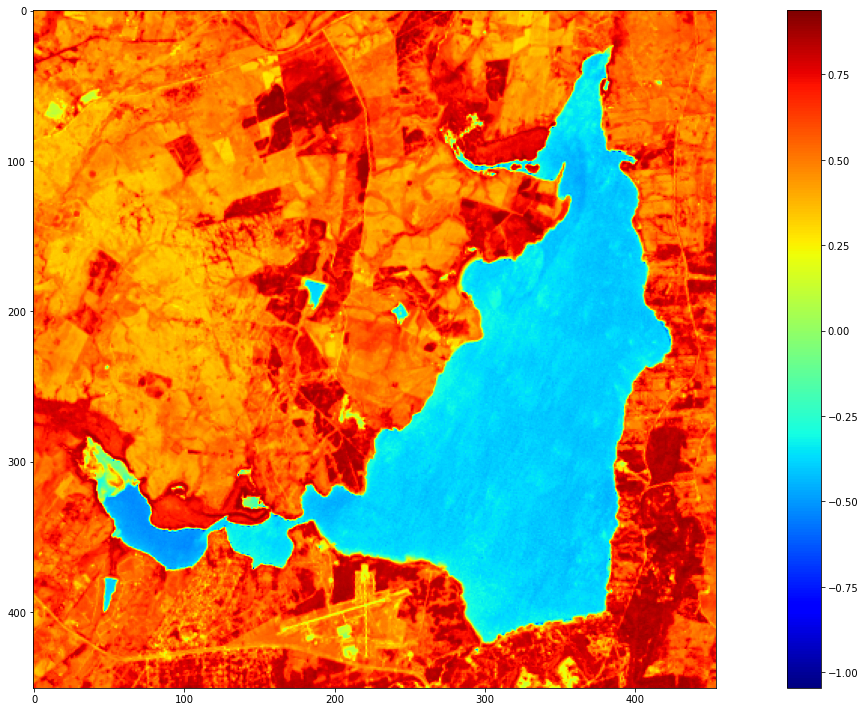

In [4]:
import matplotlib.pyplot as plt

NDCI = (b5 - b4)/(b5 + b4)

fig = plt.figure(figsize=(20,10))
plt.imshow(NDCI, cmap="jet", interpolation=None, vmin=np.amin(NDCI), vmax=np.amax(NDCI))
plt.colorbar()
fig.tight_layout()

### Save NDCI tiff

In [7]:
# NDCI geotiff path
laguna_NDCI_geotiff_path = os.path.join(settings_BID.data_path, "laguna-NDCI.tif")

coord_reference_file = [file for file in os.listdir(settings_BID.data_path) if file.endswith("B5"+".tif")][0]
ds = gdal.Open(os.path.join(settings_BID.data_path, coord_reference_file))

# set geotransform
nx = NDCI.shape[1]
ny = NDCI.shape[0]

# create the 3-band raster file
dst_ds = gdal.GetDriverByName('GTiff').Create(laguna_NDCI_geotiff_path, nx, ny, 1, gdal.GDT_Float32)

dst_ds.SetGeoTransform(ds.GetGeoTransform())    # specify coords
dst_ds.SetProjection(ds.GetProjection()) # export coords to file
dst_ds.GetRasterBand(1).WriteArray(NDCI)   # write band to the raster
dst_ds.FlushCache()                     # write to disk
dst_ds = None

LC08_223084_20200324.B5.tif
